In [14]:
from data import Data
import numpy as np
import seaborn as sns
%matplotlib inline
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
KTF.set_session(tf.Session(config=tf.ConfigProto( 
            device_count={'CPU':2, 'GPU': 1},
            allow_soft_placement=True)))

In [46]:
X_train, X_test, y_train, y_test, labels = Data("../all_data_just_a").get_data()

# Example Time series

In [48]:
X_test.shape

(10292, 200, 4, 1)

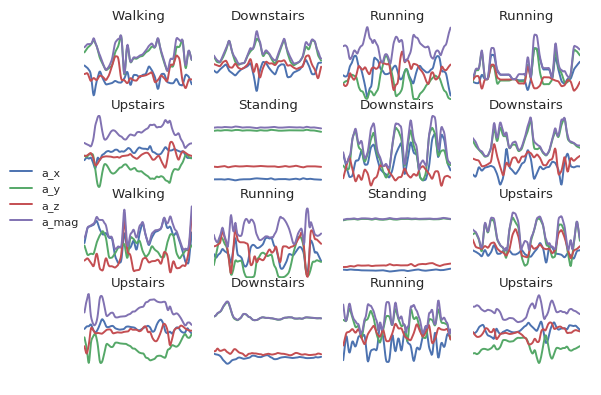

In [66]:
import matplotlib.pyplot as plt
indices = np.random.randint(X_test.shape[0], size=16)
ex_labels = labels[np.argmax(y_test[indices], axis=1)]
fig, axarr = plt.subplots(4, 4)

for index, img in enumerate(X_test[indices].reshape((-1, 200, 4))):
    lines = axarr[index // 4, index % 4].plot(img)
    axarr[index // 4, index % 4].set_title(ex_labels[index])
    axarr[index // 4, index % 4].set_axis_off()
leg = fig.legend(lines, ('a_x', 'a_y', 'a_z', 'a_mag'), "center left")

# Evaluating Raw Convolutional Model

In [7]:
model = load_model('../raw_conv.h5')

In [8]:
score = model.evaluate(X_test, y_test)

10292/10292 [==============================] - 3s     


### Compute predictions

In [13]:
y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test, axis=1)
assert (y_pred==y_true).sum() / float(len(y_true)) == score[1]

10272/10292 [============================>.] - ETA: 0s

### Confusion Matrix

['Biking' 'Downstairs' 'GymBiking' 'Jumping' 'Lunging' 'Running'
 'SittingToStanding' 'Squatting' 'Standing' 'StandingToSitting'
 'TreadmillRunning' 'Upstairs' 'Walking']


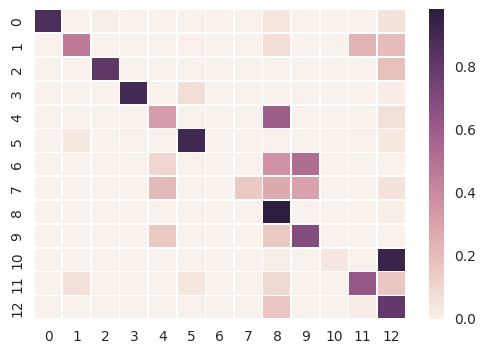

In [16]:
conf_mat = confusion_matrix(y_true, y_pred)
conf_mat = np.array(conf_mat, dtype=float)
for i, maximum in enumerate(conf_mat.sum(axis=1)):
    conf_mat[i] = conf_mat[i] / float(maximum)
sns.heatmap(conf_mat, annot=False, linewidths=.5)
print(labels)

# Evaluating Convolutional Model on GADF

In [17]:
model = load_model('../GADF_conv.h5')

In [ ]:
X_train, X_test, y_train, y_test, labels = Data("../GADF").get_data()

In [22]:
score = model.evaluate(X_test, y_test)
print(score)

10272/10292 [============================>.] - ETA: 0s[0.6341834892437378, 0.88631947148045442]


### Compute Predictions

In [25]:
y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test, axis=1)

10292/10292 [==============================] - 3s     


### Confusion Matrix

['Biking' 'Downstairs' 'GymBiking' 'Jumping' 'Lunging' 'Running'
 'SittingToStanding' 'Squatting' 'Standing' 'StandingToSitting'
 'TreadmillRunning' 'Upstairs' 'Walking']


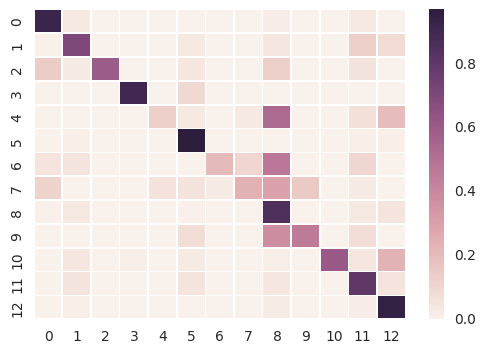

In [26]:
conf_mat = confusion_matrix(y_true, y_pred)
conf_mat = np.array(conf_mat, dtype=float)
for i, maximum in enumerate(conf_mat.sum(axis=1)):
    conf_mat[i] = conf_mat[i] / float(maximum)
sns.heatmap(conf_mat, annot=False, linewidths=.5)
print(labels)

# Evaluating Fully Connected Model

In [27]:
X_train, X_test, y_train, y_test, labels = Data("../all_data_just_a").get_data()

In [29]:
model = load_model('../fcnn.h5')

In [30]:
score = model.evaluate(X_test, y_test)
print(score)

10176/10292 [============================>.] - ETA: 0s[0.43267538632764641, 0.85396424416572814]


### Compute Predictions

In [36]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

['Biking' 'Downstairs' 'GymBiking' 'Jumping' 'Lunging' 'Running'
 'SittingToStanding' 'Squatting' 'Standing' 'StandingToSitting'
 'TreadmillRunning' 'Upstairs' 'Walking']


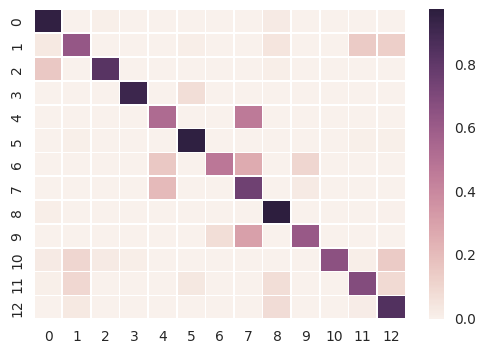

In [37]:
conf_mat = confusion_matrix(y_true, y_pred)
conf_mat = np.array(conf_mat, dtype=float)
for i, maximum in enumerate(conf_mat.sum(axis=1)):
    conf_mat[i] = conf_mat[i] / float(maximum)
sns.heatmap(conf_mat, annot=False, linewidths=.5)
print(labels)

# Cross Validation

In [38]:
import pickle
with open('../cross_validate_GADF', 'r') as f:
    scores_GADF = pickle.load(f)
with open('../cross_validate_raw_CNN', 'r') as f:
    scores = pickle.load(f)
with open('../cross_validate_GASF', 'r') as f:
    scores_GASF = pickle.load(f)
with open('../cross_validate_MTF', 'r') as f:
    scores_MTF = pickle.load(f)
with open('../cross_validate_spec', 'r') as f:
    scores_spec = pickle.load(f)
with open('../cross_validate_FCNN', 'r') as f:
    scores_FCNN = pickle.load(f)
with open('../cross_validate_GRU', 'r') as f:
    scores_GRU = pickle.load(f)
with open('../cross_validate_FCNN_tanh', 'r') as f:
    scores_FCNN_tanh = pickle.load(f)
with open('../cross_validate_raw_tanh', 'r') as f:
    scores_raw_tanh = pickle.load(f)

0.898905298612
0.881940665884
0.866666666675
0.853384505776
0.845005829778
0.841093405892
0.780981992501
0.65068013993
0.643713563965


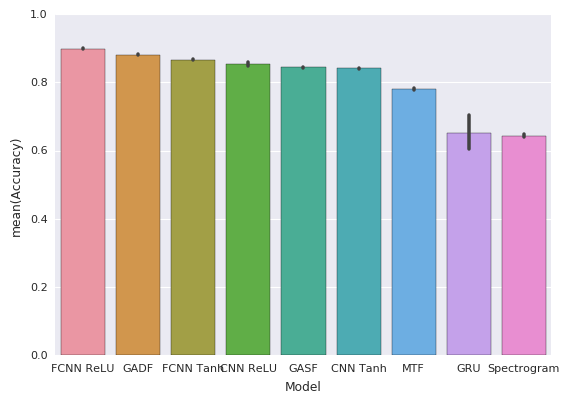

In [40]:
from scipy.stats import describe
import seaborn as sns
import pandas as pd
stats = []
accs = []
names = ["FCNN ReLU", "GADF", "FCNN Tanh", "CNN ReLU","GASF", "CNN Tanh", "MTF", "GRU", "Spectrogram"]
df = pd.DataFrame(columns=['Model', 'Accuracy'])
for i, tup in enumerate(zip([scores_FCNN,scores_GADF, scores_FCNN_tanh, scores, scores_GASF, scores_raw_tanh, scores_MTF,  scores_GRU, scores_spec], \
                                 names)):
    sc = tup[0]
    name = tup[1]
    acc = np.array(sc)[:, 1]
    for j,a in enumerate(acc):
        df.loc[i * len(acc)+j] = [name, a]
    #accs.append(acc)
    stats.append(describe(acc))
    print(stats[i].mean)
sns.set(style="darkgrid", context="paper", font="sans-serif")
ax = sns.barplot(x='Model', y='Accuracy', data=df, ci=95)

# Adversarial Attacks

In [41]:
with open('../adversarial_scores_raw.pkl', 'r') as f:
    adv_score_raw = pickle.load(f)
with open('../adversarial_scores_FCNN.pkl', 'r') as f:
    adv_score_FCNN = pickle.load(f)
with open('../adversarial_scores_GADF.pkl', 'r') as f:
    adv_score_GADF = pickle.load(f)
with open('../adversarial_scores_GASF.pkl', 'r') as f:
    adv_score_GASF = pickle.load(f)
with open('../adversarial_scores_MTF.pkl', 'r') as f:
    adv_score_MTF = pickle.load(f)
with open('../adversarial_scores_raw_tanh.pkl', 'r') as f:
    adv_score_raw_tanh = pickle.load(f)
with open('../adversarial_scores_FCNN_tanh.pkl', 'r') as f:
    adv_score_FCNN_tanh = pickle.load(f)

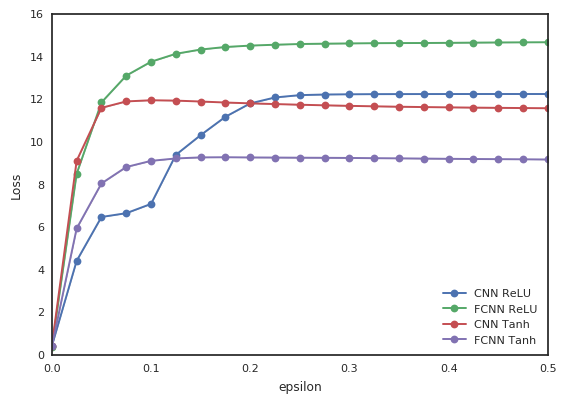

In [42]:
from scipy.stats import describe
import seaborn as sns
data = np.zeros((len(adv_score_raw),4))
for i, score in enumerate([adv_score_raw, adv_score_FCNN, adv_score_raw_tanh, adv_score_FCNN_tanh]):
    data[:, i] = [x[0] for x in score] #loss
data = data.reshape((1,)+ data.shape)
sns.set(style="white", context="paper", font="sans-serif")
ax = sns.tsplot(time=np.linspace(0.0, 0.5, 21), data=data, condition=["CNN ReLU", "FCNN ReLU", "CNN Tanh", "FCNN Tanh"], legend=True, 
                marker='o')
ax.set(xlabel='epsilon', ylabel='Loss')

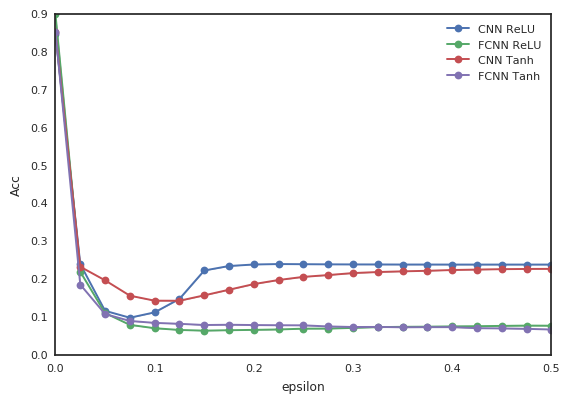

In [43]:
data = np.zeros((len(adv_score_raw),4))
for i, score in enumerate([adv_score_raw, adv_score_FCNN, adv_score_raw_tanh, adv_score_FCNN_tanh]):
    data[:, i] = [x[1] for x in score] #acc
data = data.reshape((1,)+ data.shape)
sns.set(style="white", context="paper", font="sans-serif")
ax = sns.tsplot(time=np.linspace(0.0, 0.5, 21), data=data, condition=["CNN ReLU", "FCNN ReLU", "CNN Tanh", "FCNN Tanh"], legend=True, 
                marker='o')
ax.set(xlabel='epsilon', ylabel='Acc')